1) Import Required Libraries:

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


2) Load and Normalize the MNIST Dataset:

In [2]:
#Load the MNIST dataset and normalize pixel values to the range [0, 1]
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2.1) Show Example Image Frome DAtaset:

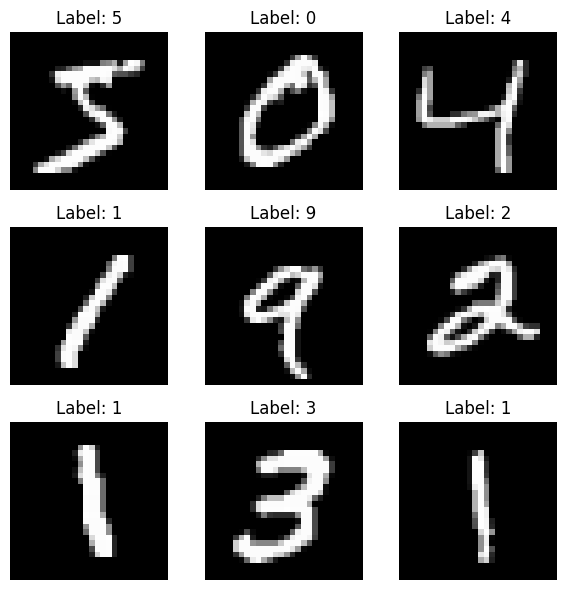

In [3]:
#displays 9 sample images from the MNIST training dataset

plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


3) Define the Model Builder Function:

In [4]:
#This function builds a simple 2-layer neural network and compiles it with the given optimizer
def build_compile(optimizer_name='SGD'):
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer_name,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model



4) Define Optimizers and Train the Models:

In [5]:
#Define six optimizers and train a model with each for 50 epochs

optimizers = [
    'SGD',
    keras.optimizers.SGD(momentum=0.9),                   # Momentum
    keras.optimizers.SGD(momentum=0.9, nesterov=True),    # Nesterov Accelerated Gradient (NAG)
    'Adagrad',
    'RMSprop',
    'Adam'
]

optimizer_names = ['SGD', 'Momentum', 'NAG', 'Adagrad', 'RMSprop', 'Adam']

histories = []

# Train each model and store the training history
for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    model = build_compile(opt)
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=50,
                        verbose=1)  # Set verbose=0 if you not want to see training progress
    histories.append(history)


Training with optimizer: SGD
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7364 - loss: 1.0210 - val_accuracy: 0.9069 - val_loss: 0.3497
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9033 - loss: 0.3524 - val_accuracy: 0.9212 - val_loss: 0.2857
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9191 - loss: 0.2906 - val_accuracy: 0.9279 - val_loss: 0.2571
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2654 - val_accuracy: 0.9331 - val_loss: 0.2355
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9334 - loss: 0.2385 - val_accuracy: 0.9379 - val_loss: 0.2185
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.2222 - val_accuracy: 0.9413 - val_loss: 0.2050
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9416 - loss: 0.2074 - val_accuracy: 0.9458 - val_loss: 0.1915
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accur

5) Plot Training and Test Accuracy Over Epochs:

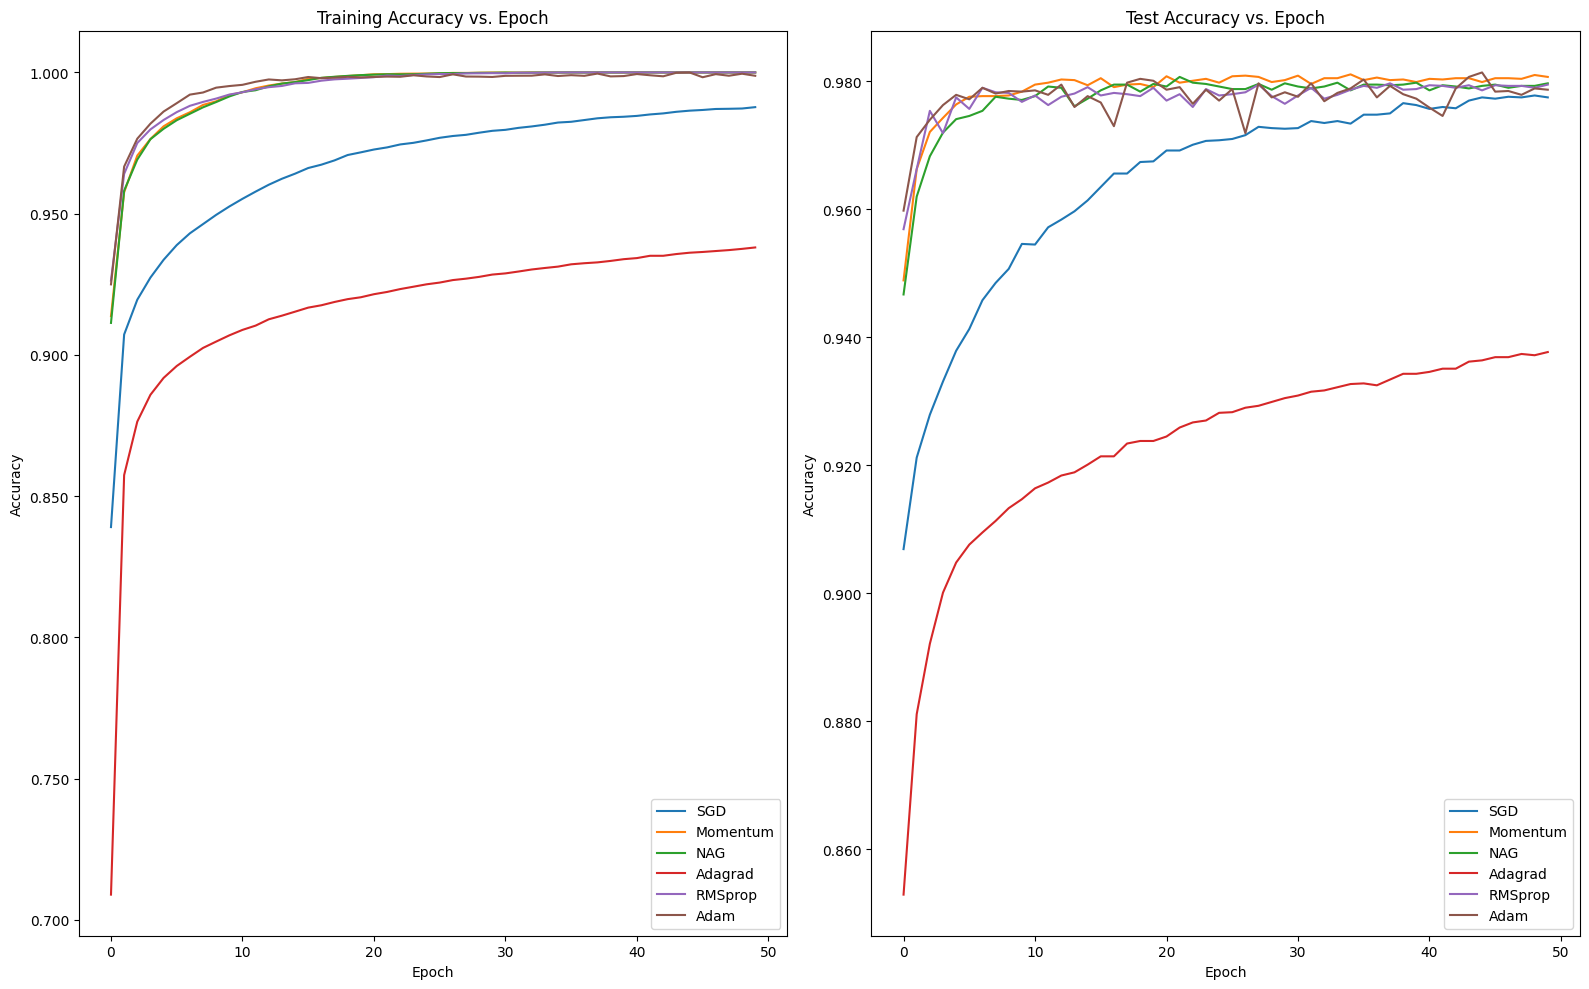

In [10]:
from matplotlib.ticker import FormatStrFormatter

# Plot training and validation (test) accuracy for each optimizer
plt.figure(figsize=(16, 10))

# Training Accuracy
plt.subplot(1, 2, 1)
for history, label in zip(histories, optimizer_names):
    plt.plot(history.history['accuracy'], label=label)
plt.title('Training Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

# Test Accuracy (Validation Accuracy)
plt.subplot(1, 2, 2)
for history, label in zip(histories, optimizer_names):
    plt.plot(history.history['val_accuracy'], label=label)
plt.title('Test Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

plt.tight_layout()
plt.show()



6) Final Accuracy Comparison (Bar Chart)

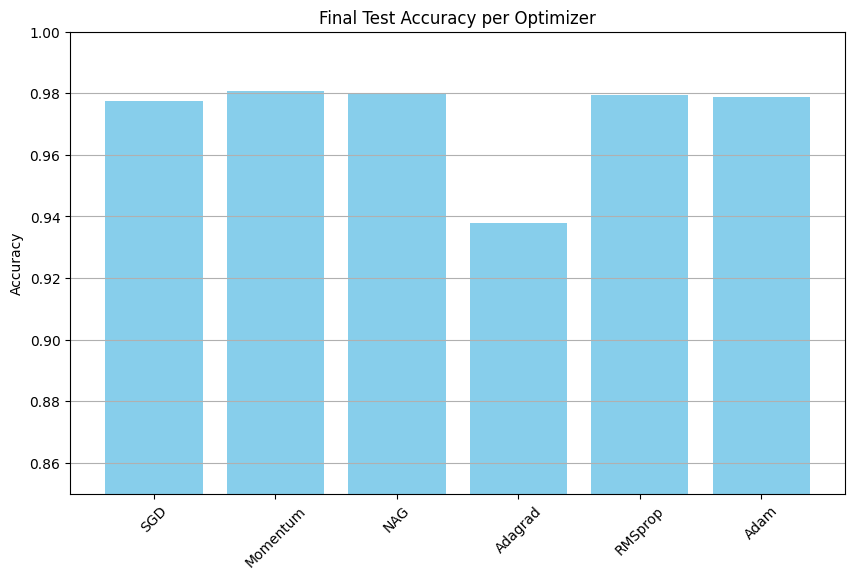

In [7]:
# Bar chart of final test accuracy
final_test_accuracies = [history.history['val_accuracy'][-1] for history in histories]

plt.figure(figsize=(10, 6))
plt.bar(optimizer_names, final_test_accuracies, color='skyblue')
plt.title('Final Test Accuracy per Optimizer')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


***7) Report & Experince***



## Final Conclusion: Comparison of Optimizers on MNIST

Based on the **Training Accuracy vs. Epoch** and **Test Accuracy vs. Epoch** plots, we can draw the following insights for each optimizer:



### 1. **Adam**:
- Achieved the highest accuracy on both training and test sets.
- Converged very quickly in the early epochs.
- Showed stable and consistent performance throughout.
-  **Conclusion:** Adam is the top performer and an excellent default optimizer, especially for image classification tasks like MNIST.


### 2. **NAG (Nesterov Accelerated Gradient)** & **Momentum**:
- Both performed very closely to Adam.
- Reached high accuracy in fewer epochs and maintained stability.
-  **Conclusion:** Great alternatives to Adam, especially when fine-tuning speed and convergence is important.


### 3. **RMSprop**:
- Also showed strong performance, close to Adam and Momentum.
- Good convergence and smooth learning curves.
- Typically well-suited for sequential data (e.g., RNNs), but performed well here too.
-  **Conclusion:** Reliable choice for dynamic learning rate scenarios.


### 4. **SGD (Stochastic Gradient Descent)**:
- Slower convergence compared to the others.
- Eventually reached decent accuracy but required more epochs.
-  **Conclusion:** Simple and foundational, but underperforms unless tuned carefully (e.g., with learning rate schedules or momentum).


### 5. **Adagrad**:
- Weakest performance in both training and test accuracy.
- Suffered from aggressively decreasing learning rate over time.
-  **Conclusion:** Not suitable for this task; better for sparse data or problems where early updates are most valuable.
